In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sir_classical_spreading import SIR_classical


In [14]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [15]:
def get_starting_nodes(G, method):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)
    
    elif method  == 'eigenvector':
        node_dict = nx.eigenvector_centrality(G)
    
    elif method == 'katz':
        node_dict = nx.katz_centrality(G)
    
    elif method == 'harmonic':
        node_dict = nx.harmonic_centrality(G)
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_10 = sorted_nodes[:100]
        
    # Extract only the node IDs from the sorted list
    top_10_node_ids = [node for node, _ in top_10]


    # Display the node IDs
    #print(top_10_node_ids)
    #print(top_10)
    return top_10_node_ids


In [ ]:
get_starting_nodes(G, 'closeness')

In [17]:
# Read the graph from the edgelist
G_cc = nx.read_edgelist('M1/edges.csv', delimiter=',')

nodes_to_remove = get_starting_nodes(G,'closeness')
# Remove nodes from the graph
G_cc.remove_nodes_from(nodes_to_remove)

# Create a new graph without the specified nodes
G_cc_ = G_cc.subgraph([node for node in G.nodes if node not in nodes_to_remove])



In [20]:
data_closeness_immune = SIR_classical(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_cc_, 'closeness') )
data_closeness = SIR_classical(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'closeness') )


data_frames_immunity = [
    data_closeness_immune,
    data_closeness
]

In [18]:
def plot_immune(data_frames):
    methods = ['immunisation', 'yolo']
    # Define a custom color palette
    custom_palette = ['green', 'hotpink']  # Add more colors if needed
    # Create a graph with the different df's
    for i, df_data in enumerate(data_frames):
        sns.lineplot(data = df_data, x='t', y='IR', label=f'Method {methods[i]}', color = custom_palette[i])   


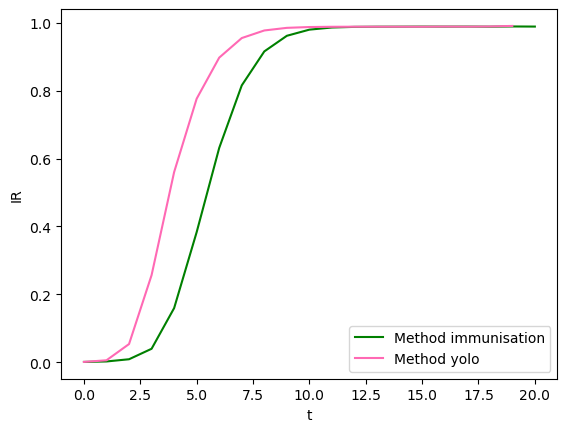

In [19]:
plot_immune(data_frames_immunity)